# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Outlier-removal:" data-toc-modified-id="Outlier-removal:-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier removal:</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

In [1]:
import urllib
import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import pylab as pl
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# 1. DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [2]:
!wget https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW9_fb55/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv

--2018-11-13 21:30:08--  https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW9_fb55/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.200.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.200.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7852 (7.7K) [text/plain]
Saving to: ‘World firearms murders and ownership - Sheet 1.csv’

World firearms murd 100%[===================>]   7.67K  --.-KB/s    in 0s      

2018-11-13 21:30:08 (146 MB/s) - ‘World firearms murders and ownership - Sheet 1.csv’ saved [7852/7852]



In [3]:
urllib.request.urlretrieve("data:application/octet-stream;charset=utf-8,Country%2CGuns%20per%20100%20inhabitants%2CNumber%20of%20mass%20shootings%20(1983-2013)%0AAustralia%2C15%2C4%0AAustria%2C30.4%2C1%0ABelgium%2C17.2%2C2%0ACanada%2C30.8%2C4%0ADenmark%2C12%2C0%0AFinland%2C45.3%2C2%0AFrance%2C31.2%2C6%0AGermany%2C30.3%2C7%0AGreece%2C22.5%2C0%0AHolland%2C3.9%2C2%0AHungary%2C5.5%2C0%0AIceland%2C30.3%2C0%0AIreland%2C8.6%2C0%0AItaly%2C11.9%2C0%0AJapan%2C0.6%2C0%0ALuxembourg%2C15.3%2C0%0ANew%20Zealand%2C22.6%2C3%0ANorway%2C31.3%2C1%0APoland%2C1.3%2C0%0APortugal%2C8.5%2C1%0ASpain%2C10.4%2C1%0ASweden%2C31.6%2C2%0ASwitzerland%2C45.7%2C2%0AUnited%20Kingdom%2C6.2%2C3%0AUnited%20States%2C88.8%2C78","Guns owned vs. mass shootings across nations.csv")

('Guns owned vs. mass shootings across nations.csv',
 <email.message.Message at 0x7ff58b2944e0>)

In [4]:
!wget http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv

--2018-11-13 21:30:08--  http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv
Resolving api.worldbank.org (api.worldbank.org)... 52.202.62.36
Connecting to api.worldbank.org (api.worldbank.org)|52.202.62.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79717 (78K) [application/zip]
Saving to: ‘SP.POP.TOTL?downloadformat=csv’

SP.POP.TOTL?downloa 100%[===================>]  77.85K  --.-KB/s    in 0.01s   

2018-11-13 21:30:08 (6.29 MB/s) - ‘SP.POP.TOTL?downloadformat=csv’ saved [79717/79717]



In [ ]:
!wget http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv

--2018-11-13 21:30:08--  http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv
Resolving api.worldbank.org (api.worldbank.org)... 52.202.62.36
Connecting to api.worldbank.org (api.worldbank.org)|52.202.62.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116071 (113K) [application/zip]
Saving to: ‘NY.GDP.MKTP.CD?downloadformat=csv’

NY.GDP.MKTP.CD?down 100%[===================>] 113.35K  --.-KB/s    in 0.03s   

2018-11-13 21:30:09 (4.22 MB/s) - ‘NY.GDP.MKTP.CD?downloadformat=csv’ saved [116071/116071]



In [ ]:
!unzip 'SP.POP.TOTL?downloadformat=csv' -d $PUIDATA
!unzip 'NY.GDP.MKTP.CD?downloadformat=csv' -d $PUIDATA

Archive:  SP.POP.TOTL?downloadformat=csv
replace /nfshome/cd2682/PUIdata/Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!mv 'Guns owned vs. mass shootings across nations.csv' $PUIDATA
!mv 'World firearms murders and ownership - Sheet 1.csv' $PUIDATA

In [ ]:
!rm -f SP.POP.TOTL?downloadformat=csv
!rm -f NY.GDP.MKTP.CD?downloadformat=csv

In [2]:
firearm = pd.read_csv(os.getenv("PUIDATA") + "/World firearms murders and ownership - Sheet 1.csv")
number_mass_shooting = pd.read_csv(os.getenv("PUIDATA") + "/Guns owned vs. mass shootings across nations.csv").dropna()
gdp = pd.read_csv(os.getenv("PUIDATA") + "/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv", skiprows=1, header=1)
pop = pd.read_csv(os.getenv("PUIDATA") + "/API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv", skiprows=1, header=1)

In [3]:
firearm = firearm[['Country/Territory','Number of homicides by firearm','Average total all civilian firearms']].dropna()
firearm.rename(columns={"Country/Territory": "Country"}, inplace=True)
firearm.head()

,Country,Number of homicides by firearm,Average total all civilian firearms
0,Albania,56.0,270000.0
1,Algeria,20.0,1900000.0
4,Argentina,1198.0,3950000.0
5,Armenia,9.0,380000.0
6,Australia,30.0,3050000.0


In [4]:
number_mass_shooting.rename(columns={'Number of mass shootings (1983-2013)': 'Number of mass shootings'}, inplace=True)
number_mass_shooting.head()

,Country,Guns per 100 inhabitants,Number of mass shootings
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [5]:
gdp = gdp[['Country Name', '2012']].dropna()
gdp.rename(columns={'2012': 'gdp'}, inplace=True)
gdp.head()

,Country Name,gdp
1,Afghanistan,2.053654e+10
2,Angola,1.139232e+11
3,Albania,1.231978e+10
4,Andorra,3.164615e+09
5,Arab World,2.786139e+12


In [6]:
pop = pop[['Country Name', '2012']].dropna()
pop.rename(columns={'2012': 'pop'}, inplace=True)
pop.head()

,Country Name,pop
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [7]:
pop_gdp = pd.merge(pop, gdp, how='inner')
pop_gdp.head()

,Country Name,pop,gdp
0,Afghanistan,30696958.0,2.053654e+10
1,Angola,25096150.0,1.139232e+11
2,Albania,2900401.0,1.231978e+10
3,Andorra,82431.0,3.164615e+09
4,Arab World,373306993.0,2.786139e+12


In [8]:
mass_firearm = pd.merge(number_mass_shooting, firearm, how='inner')
mass_firearm.head()

,Country,Guns per 100 inhabitants,Number of mass shootings,Number of homicides by firearm,Average total all civilian firearms
0,Australia,15.0,4,30.0,3050000.0
1,Austria,30.4,1,18.0,2500000.0
2,Belgium,17.2,2,70.0,1800000.0
3,Canada,30.8,4,173.0,9950000.0
4,Denmark,12.0,0,15.0,650000.0


In [9]:
df_ = pop_gdp.merge(mass_firearm, right_on="Country", left_on="Country Name")
df_.head()

,Country Name,pop,gdp,Country,Guns per 100 inhabitants,Number of mass shootings,Number of homicides by firearm,Average total all civilian firearms
0,Australia,22742475.0,1.543411e+12,Australia,15.0,4,30.0,3050000.0
1,Austria,8429991.0,4.094252e+11,Austria,30.4,1,18.0,2500000.0
2,Belgium,11128246.0,4.978842e+11,Belgium,17.2,2,70.0,1800000.0
3,Canada,34750545.0,1.824289e+12,Canada,30.8,4,173.0,9950000.0
4,Switzerland,7996861.0,6.680436e+11,Switzerland,45.7,2,57.0,3400000.0


# 2. Exploration

## 2.1 plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


## 2.1.1 plot mass shooting vs gdp in absolute numbers, with errors

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


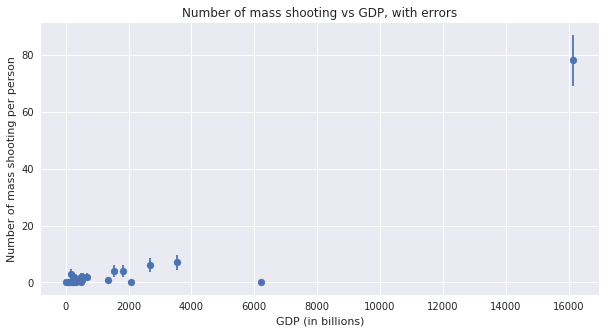

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [10]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
pl.title('Number of mass shooting vs GDP, with errors')

scatter = ax.scatter(df_.gdp / 1e9, df_['Number of mass shootings'])
ax.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")


## 2.1.2 plot mass shooting vs gdp per person. Show the errorbars (y errors)

In [11]:
df_['gdp_per_person'] = df_['gdp'] / df_['pop'] * 1e3

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


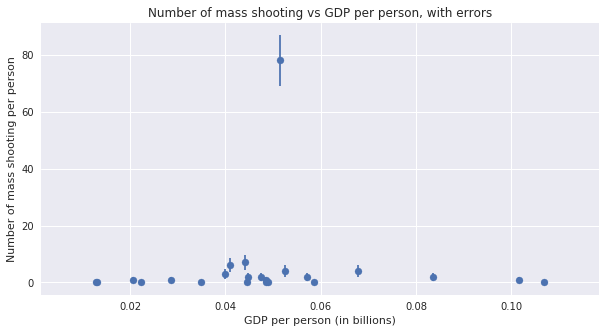

Number of mass shooting vs GDP per person, errors represent Poisson statistics.
The datapoint in the top of the plot is the USA, which has a medium level of GDP per person and the highest number of mass shootings


In [12]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
pl.title('Number of mass shooting vs GDP per person, with errors')

scatter = ax.scatter(df_.gdp_per_person / 1e9, df_['Number of mass shootings'])
ax.errorbar(df_.gdp_per_person / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP per person (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP per person, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint in the top of the plot is the USA, " + 
       "which has a medium level of GDP per person and the highest number of mass shootings")



## 2.2 plot the average number of civilian fire arms per person vs GDP
## 2.2.1 plot the average number of civilian fire arms per person, without errors
first without errors, then with errors. are there  points that look like outliers?

In [13]:
df_['avg_firearm'] = df_['Average total all civilian firearms'] / df_['pop']
# df_.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


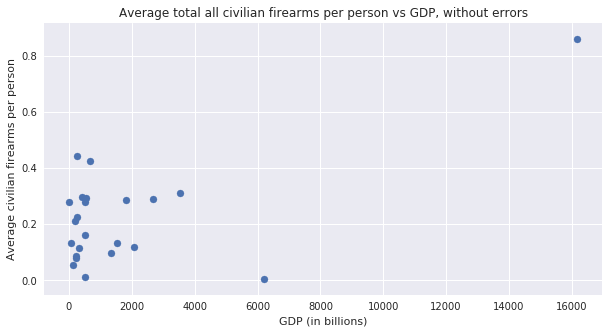

Average total all civilian firearms per person vs GDP, The datapoint to the top right of the plot is the USA, which has the highest GDP and the highest Average civilian firearms per person


In [14]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
pl.title('Average total all civilian firearms per person vs GDP, without errors')

scatter = ax.scatter(df_.gdp / 1e9, df_['avg_firearm'])
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Average civilian firearms per person")
ax.set_ylim()
pl.show()
print ("Average total all civilian firearms per person vs GDP, " + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has the highest GDP and the highest Average civilian firearms per person")

## 2.2.2 plot the average number of civilian fire arms per person, with errors

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


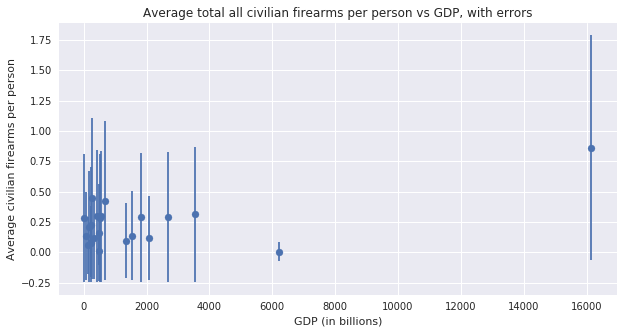

Average total all civilian firearms per person vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has the highest GDP and the highest Average civilian firearms per person


In [15]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
pl.title('Average total all civilian firearms per person vs GDP, with errors')

scatter = ax.scatter(df_.gdp / 1e9, df_['avg_firearm'])
ax.errorbar(df_.gdp / 1e9, df_['avg_firearm'], 
            yerr = np.sqrt(df_['avg_firearm'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Average civilian firearms per person")
ax.set_ylim()
pl.show()
print ("Average total all civilian firearms per person vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has the highest GDP and the highest Average civilian firearms per person")

## 2.3 plot the average number of homicide by fire arms per person
## 2.3.1 plot the average number of homicide by fire arms per person as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


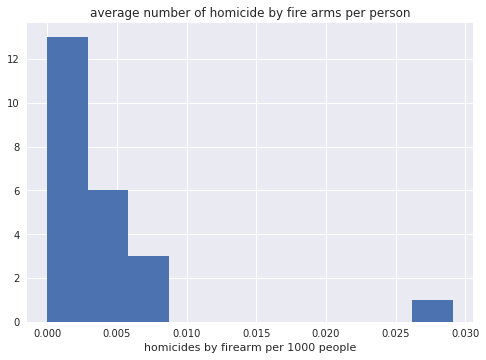

In [16]:
fig, ax = plt.subplots()
pl.title('average number of homicide by fire arms per person')
ax.hist(df_['Number of homicides by firearm'] / df_['pop'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people');

## 2.3.2 plot the average number of homicide by fire arms per person against the country GDP, with statistical errors.

In [17]:
df_['homicidepp'] = df_['Number of homicides by firearm'] / df_['pop'] * 1e3
# df_.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


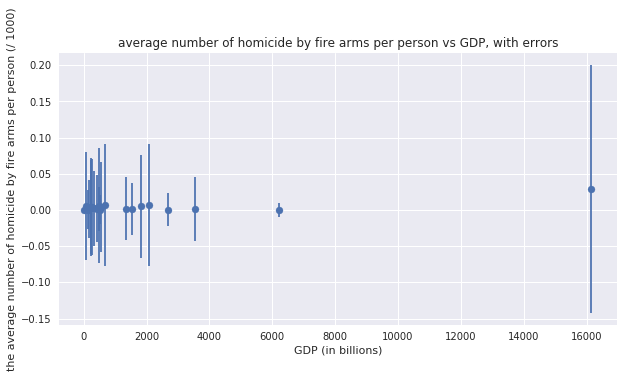

the average number of homicide by fire arms per person vs country GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has the highest GDP and the highest average number of homicide by fire arms per person


In [18]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
pl.title('average number of homicide by fire arms per person vs GDP, with errors')

scatter = ax.scatter(df_.gdp / 1e9, df_['homicidepp'])
ax.errorbar(df_.gdp / 1e9, df_['homicidepp'], 
            yerr = np.sqrt(df_['homicidepp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("the average number of homicide by fire arms per person (/ 1000)")
ax.set_ylim()
pl.show()
print ("the average number of homicide by fire arms per person vs country GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has the highest GDP and the highest average number of homicide by fire arms per person")

## 2.4 plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color

## 2.4.1 plot the number of  homicides by fire arm vs the number of civilian firearms without errors

In [19]:
# df_.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


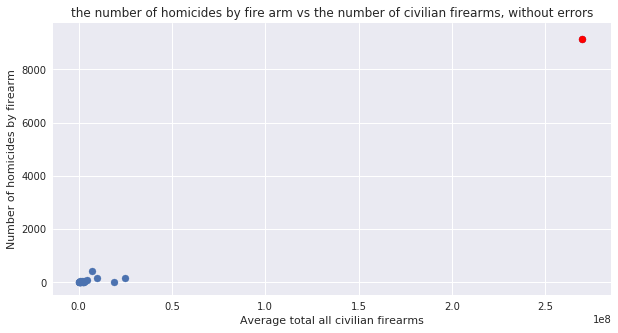

the number of homicides by fire arm vs the number of civilian firearms, The datapoint in different color to the top right of the plot is the USA, which has the highest the number of homicides by fire arm and highest number of civilian firearms


In [20]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
pl.title('the number of homicides by fire arm vs the number of civilian firearms, without errors')
    
scatter = ax.scatter(df_['Average total all civilian firearms'], df_['Number of homicides by firearm'])
scatter_us = ax.scatter(df_[df_['Country Name'] == "United States"]["Average total all civilian firearms"], 
           df_[df_['Country Name'] == "United States"]['Number of homicides by firearm'], c="r")

ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of homicides by firearm")
ax.set_ylim()
pl.show()
print ("the number of homicides by fire arm vs the number of civilian firearms, " + 
       "The datapoint in different color to the top right of the plot is the USA, " + 
       "which has the highest the number of homicides by fire arm and highest number of civilian firearms")

## 2.4.2 plot the number of  homicides by fire arm vs the number of civilian firearms with errors

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


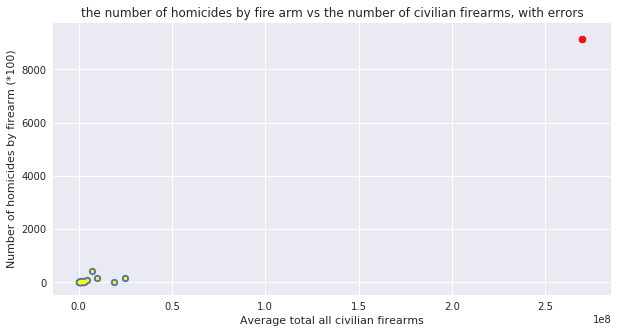

the number of homicides by fire arm vs the number of civilian firearms, errors represent Poisson statistics, The datapoint in different color to the top right of the plot is the USA, which has the highest the number of homicides by fire arm and highest number of civilian firearms


In [21]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
pl.title('the number of homicides by fire arm vs the number of civilian firearms, with errors')

scatter = ax.scatter(df_['Average total all civilian firearms'], df_['Number of homicides by firearm'])
scatter_us = ax.scatter(df_[df_['Country Name'] == "United States"]["Average total all civilian firearms"], 
           df_[df_['Country Name'] == "United States"]['Number of homicides by firearm'], c="r")

ax.errorbar(df_['Average total all civilian firearms'], df_['Number of homicides by firearm'], 
            yerr = np.sqrt(df_['Number of homicides by firearm'] * 1.0), fmt = '.', c='yellow')
errorbar_us = ax.errorbar(df_[df_['Country Name'] == "United States"]['Average total all civilian firearms'], 
            df_[df_['Country Name'] == "United States"]['Number of homicides by firearm'], 
            yerr = np.sqrt(df_[df_['Country Name'] == "United States"]['Number of homicides by firearm'] * 1.0), 
                          fmt = '.', c = 'r')

ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of homicides by firearm (*100)")
ax.set_ylim()
pl.show()
print ("the number of homicides by fire arm vs the number of civilian firearms, " + 
       "errors represent Poisson statistics, " +
       "The datapoint in different color to the top right of the plot is the USA, " + 
       "which has the highest the number of homicides by fire arm and highest number of civilian firearms")

## 2.5 plot the number of  mass shootings vs the number of civilian firearms. plot the  US in a different color
## 2.5.1 plot the number of  mass shootings against the number of civilian firearms, without errors

In [22]:
# df_.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


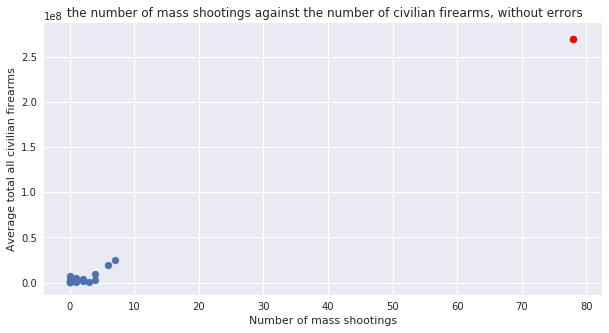

the number of mass shootings vs the number of civilian firearms, The datapoint in different color to the top right of the plot is the USA, which has the highest the number of the number of mass shootings and highest Average total all civilian firearms


In [23]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
pl.title(' the number of mass shootings against the number of civilian firearms, without errors')
    
scatter = ax.scatter(df_['Number of mass shootings'], df_['Average total all civilian firearms'])
scatter_us = ax.scatter(df_[df_['Country Name'] == "United States"]["Number of mass shootings"], 
           df_[df_['Country Name'] == "United States"]['Average total all civilian firearms'], c="r")

ax.set_xlabel("Number of mass shootings")
ax.set_ylabel("Average total all civilian firearms")
ax.set_ylim()
pl.show()
print ("the number of mass shootings vs the number of civilian firearms, " + 
       "The datapoint in different color to the top right of the plot is the USA, " + 
       "which has the highest the number of the number of mass shootings and highest Average total all civilian firearms")

## 2.5.2 plot the number of  mass shootings against the number of civilian firearms, with errors

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


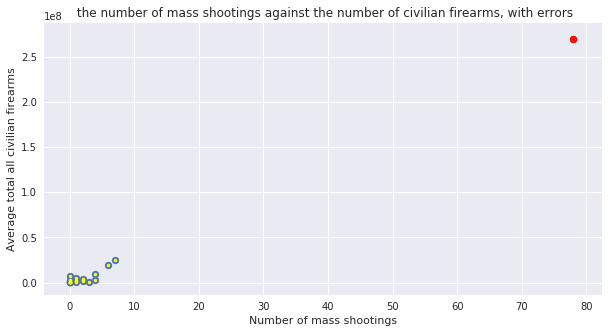

the number of mass shootings vs the number of civilian firearms, The datapoint in different color to the top right of the plot is the USA, which has the highest the number of the number of mass shootings and highest Average total all civilian firearms


In [24]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
pl.title(' the number of mass shootings against the number of civilian firearms, with errors')

scatter = ax.scatter(df_['Number of mass shootings'], df_['Average total all civilian firearms'])
scatter_us = ax.scatter(df_[df_['Country Name'] == "United States"]["Number of mass shootings"], 
           df_[df_['Country Name'] == "United States"]['Average total all civilian firearms'], c="r")

ax.errorbar(df_['Number of mass shootings'], df_['Average total all civilian firearms'], 
            yerr = np.sqrt(df_['Average total all civilian firearms'] * 1.0), fmt = '.', c='yellow')
errorbar_us = ax.errorbar(df_[df_['Country Name'] == "United States"]['Number of mass shootings'], 
            df_[df_['Country Name'] == "United States"]['Average total all civilian firearms'], 
            yerr = np.sqrt(df_[df_['Country Name'] == "United States"]['Average total all civilian firearms'] * 1.0), 
                          fmt = '.', c = 'r')

ax.set_xlabel("Number of mass shootings")
ax.set_ylabel("Average total all civilian firearms")
ax.set_ylim()
pl.show()
print ("the number of mass shootings vs the number of civilian firearms, " + 
       "The datapoint in different color to the top right of the plot is the USA, " + 
       "which has the highest the number of the number of mass shootings and highest Average total all civilian firearms")

# 3. Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [25]:
df_.head()

,Country Name,pop,gdp,Country,Guns per 100 inhabitants,Number of mass shootings,Number of homicides by firearm,Average total all civilian firearms,gdp_per_person,avg_firearm,homicidepp
0,Australia,22742475.0,1.543411e+12,Australia,15.0,4,30.0,3050000.0,6.786469e+07,0.134110,0.001319
1,Austria,8429991.0,4.094252e+11,Austria,30.4,1,18.0,2500000.0,4.856770e+07,0.296560,0.002135
2,Belgium,11128246.0,4.978842e+11,Belgium,17.2,2,70.0,1800000.0,4.474058e+07,0.161751,0.006290
3,Canada,34750545.0,1.824289e+12,Canada,30.8,4,173.0,9950000.0,5.249669e+07,0.286326,0.004978
4,Switzerland,7996861.0,6.680436e+11,Switzerland,45.7,2,57.0,3400000.0,8.353823e+07,0.425167,0.007128


In [26]:
df_['shootingspp'] = df_["Number of mass shootings"] / df_['pop'] * 1e7
df_.head()

,Country Name,pop,gdp,Country,Guns per 100 inhabitants,Number of mass shootings,Number of homicides by firearm,Average total all civilian firearms,gdp_per_person,avg_firearm,homicidepp,shootingspp
0,Australia,22742475.0,1.543411e+12,Australia,15.0,4,30.0,3050000.0,6.786469e+07,0.134110,0.001319,1.758824
1,Austria,8429991.0,4.094252e+11,Austria,30.4,1,18.0,2500000.0,4.856770e+07,0.296560,0.002135,1.186241
2,Belgium,11128246.0,4.978842e+11,Belgium,17.2,2,70.0,1800000.0,4.474058e+07,0.161751,0.006290,1.797228
3,Canada,34750545.0,1.824289e+12,Canada,30.8,4,173.0,9950000.0,5.249669e+07,0.286326,0.004978,1.151061
4,Switzerland,7996861.0,6.680436e+11,Switzerland,45.7,2,57.0,3400000.0,8.353823e+07,0.425167,0.007128,2.500981


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


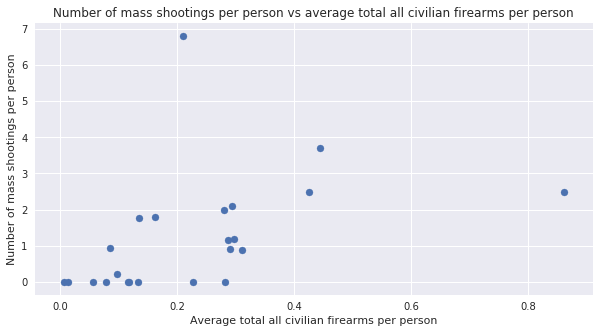

In [27]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
pl.title('Number of mass shootings per person vs average total all civilian firearms per person')

ax.scatter(df_['avg_firearm'], df_['shootingspp'])
ax.set_xlabel("Average total all civilian firearms per person")
ax.set_ylabel("Number of mass shootings per person")
ax.set_ylim()
pl.show()

## 3.1 statsmodels OLS

In [28]:
x = df_['avg_firearm']
x_add_constant = sm.add_constant(x)
y = df_['shootingspp']

In [29]:
smfit_ols = smf.OLS(y, x_add_constant, data = df_).fit()
smfit_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     4.981
Date:                Tue, 13 Nov 2018   Prob (F-statistic):             0.0367
Time:                        22:01:01   Log-Likelihood:                -40.676
No. Observations:                  23   AIC:                             85.35
Df Residuals:                      21   BIC:                             87.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           0.3684      0.497      0.742      0.467        -0.665     1.402
avg_firearm     3.8373      1.719      2.232      0.037         0.262     7.413
==============================================================================
Omnibus:                       34.558   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.760
Skew:                           2.666   Prob(JB):                     5.32e-20
Kurtosis:                      11.012   Cond. No.                         5.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


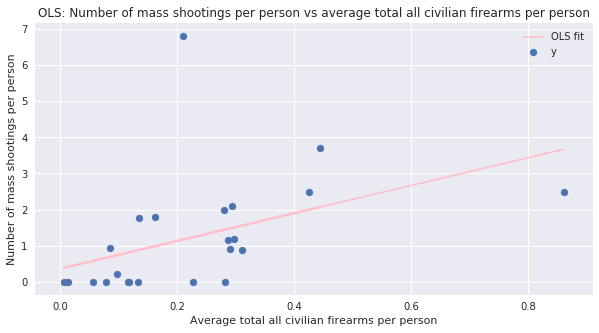

In [30]:
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
pl.title('OLS: Number of mass shootings per person vs average total all civilian firearms per person')

ax.scatter(df_['avg_firearm'], df_['shootingspp'], label='y')
plt.plot(x, smfit_ols.predict(x_add_constant), label="OLS fit", c ='pink')

ax.set_xlabel("Average total all civilian firearms per person")
ax.set_ylabel("Number of mass shootings per person")
ax.set_ylim()
plt.legend()
pl.show()

## 3.2 Statsmodels WLS

In [31]:
smfit_wls = smf.WLS(y, x_add_constant, weights=[100 / np.sqrt(xx) for xx in x], data=df_).fit()
smfit_wls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.281
Model:                            WLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     8.220
Date:                Tue, 13 Nov 2018   Prob (F-statistic):            0.00923
Time:                        22:01:02   Log-Likelihood:                -38.631
No. Observations:                  23   AIC:                             81.26
Df Residuals:                      21   BIC:                             83.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           0.0763      0.354      0.216      0.831        -0.659     0.812
avg_firearm     4.9500      1.727      2.867      0.009         1.359     8.541
==============================================================================
Omnibus:                       35.826   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.403
Skew:                           2.738   Prob(JB):                     4.29e-22
Kurtosis:                      11.526   Cond. No.                         6.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


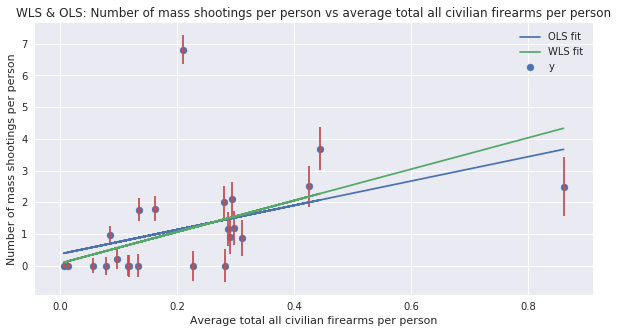

In [32]:
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
pl.title('WLS & OLS: Number of mass shootings per person vs average total all civilian firearms per person')

ax.scatter(x, y, label='y')
plt.plot(x, smfit_ols.predict(x_add_constant), label="OLS fit")
plt.plot(x, smfit_wls.predict(x_add_constant), label="WLS fit")
plt.errorbar(x, y, yerr=[np.sqrt(xx) for xx in x], fmt='.', label='')

ax.set_xlabel("Average total all civilian firearms per person")
ax.set_ylabel("Number of mass shootings per person")
ax.set_ylim()
plt.legend()
pl.show()

## 3.3 Seaborn

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


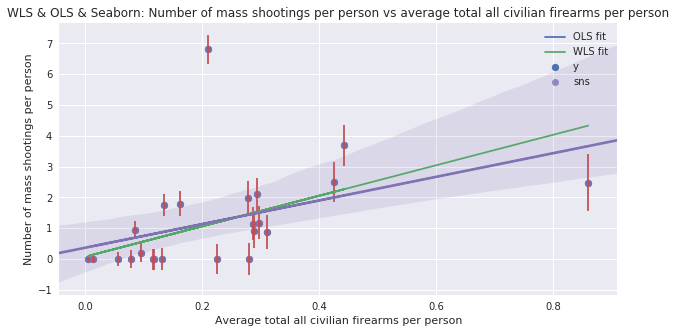

In [33]:
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
pl.title('WLS & OLS & Seaborn: Number of mass shootings per person vs average total all civilian firearms per person')

ax.scatter(x, y, label='y')
plt.plot(x, smfit_ols.predict(x_add_constant), label="OLS fit")
plt.plot(x, smfit_wls.predict(x_add_constant), label="WLS fit")
plt.errorbar(x, y, yerr=[np.sqrt(xx) for xx in x], fmt='.', label='')
sns.regplot(x, y, ax=ax, label="sns")

ax.set_xlabel("Average total all civilian firearms per person")
ax.set_ylabel("Number of mass shootings per person")
ax.set_ylim()
plt.legend()
pl.show()

## 3.4 Numpy.polyfit

In [34]:
coefs, ffits = np.polyfit(x,y,1)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


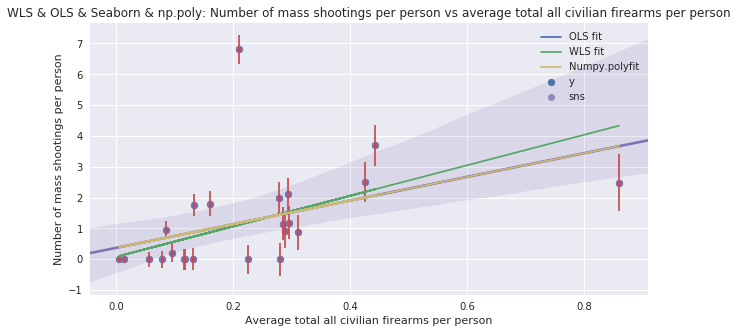

In [35]:
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
pl.title('WLS & OLS & Seaborn & np.poly: Number of mass shootings per person vs average total all civilian firearms per person')

ax.scatter(x, y, label='y')
plt.plot(x, smfit_ols.predict(x_add_constant), label="OLS fit")
plt.plot(x, smfit_wls.predict(x_add_constant), label="WLS fit")
plt.errorbar(x, y, yerr=[np.sqrt(xx) for xx in x], fmt='.', label='')
sns.regplot(x, y, ax=ax, label="sns")
plt.plot(x, coefs * x + ffits,  label = 'Numpy.polyfit')

ax.set_xlabel("Average total all civilian firearms per person")
ax.set_ylabel("Number of mass shootings per person")
ax.set_ylim()
plt.legend()
pl.show()

## Outlier removal:
The concept of outlier is actually rather sophisticated: a point can be an outlier in a context but not in another. If you want to remove outliers and try different fits, here is some info on how to remove data efficiently from a dataset 
    https://gist.github.com/fedhere/89db40a3c9a28335bf5a35d52a52c595

In [36]:
df_.head()

,Country Name,pop,gdp,Country,Guns per 100 inhabitants,Number of mass shootings,Number of homicides by firearm,Average total all civilian firearms,gdp_per_person,avg_firearm,homicidepp,shootingspp
0,Australia,22742475.0,1.543411e+12,Australia,15.0,4,30.0,3050000.0,6.786469e+07,0.134110,0.001319,1.758824
1,Austria,8429991.0,4.094252e+11,Austria,30.4,1,18.0,2500000.0,4.856770e+07,0.296560,0.002135,1.186241
2,Belgium,11128246.0,4.978842e+11,Belgium,17.2,2,70.0,1800000.0,4.474058e+07,0.161751,0.006290,1.797228
3,Canada,34750545.0,1.824289e+12,Canada,30.8,4,173.0,9950000.0,5.249669e+07,0.286326,0.004978,1.151061
4,Switzerland,7996861.0,6.680436e+11,Switzerland,45.7,2,57.0,3400000.0,8.353823e+07,0.425167,0.007128,2.500981


In [37]:
df_outlier = df_[(df_['avg_firearm'] < 0.5) & (df_['shootingspp'] < 2.5)]

In [38]:
df_outlier.head()

,Country Name,pop,gdp,Country,Guns per 100 inhabitants,Number of mass shootings,Number of homicides by firearm,Average total all civilian firearms,gdp_per_person,avg_firearm,homicidepp,shootingspp
0,Australia,22742475.0,1.543411e+12,Australia,15.0,4,30.0,3050000.0,6.786469e+07,0.134110,0.001319,1.758824
1,Austria,8429991.0,4.094252e+11,Austria,30.4,1,18.0,2500000.0,4.856770e+07,0.296560,0.002135,1.186241
2,Belgium,11128246.0,4.978842e+11,Belgium,17.2,2,70.0,1800000.0,4.474058e+07,0.161751,0.006290,1.797228
3,Canada,34750545.0,1.824289e+12,Canada,30.8,4,173.0,9950000.0,5.249669e+07,0.286326,0.004978,1.151061
5,Germany,80425823.0,3.543984e+12,Germany,30.3,7,158.0,25000000.0,4.406525e+07,0.310845,0.001965,0.870367


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


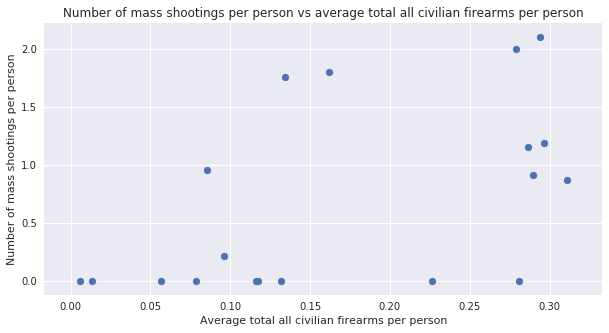

In [39]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
pl.title('Number of mass shootings per person vs average total all civilian firearms per person')

ax.scatter(df_outlier['avg_firearm'], df_outlier['shootingspp'])
ax.set_xlabel("Average total all civilian firearms per person")
ax.set_ylabel("Number of mass shootings per person")
ax.set_ylim()
pl.show()

In [40]:
x_new  = df_outlier['avg_firearm']
y_new = df_outlier['shootingspp']
x_new_add = sm.add_constant(x_new)
# x_new.shape

In [41]:
smfit_ols = smf.OLS(y_new, x_new_add, data = df_outlier).fit()
smfit_ols.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     6.791
Date:                Tue, 13 Nov 2018   Prob (F-statistic):             0.0185
Time:                        22:01:06   Log-Likelihood:                -18.725
No. Observations:                  19   AIC:                             41.45
Df Residuals:                      17   BIC:                             43.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const          -0.0041      0.306     -0.013      0.989        -0.650     0.642
avg_firearm     3.9919      1.532      2.606      0.018         0.760     7.224
==============================================================================
Omnibus:                        1.218   Durbin-Watson:                   1.275
Prob(Omnibus):                  0.544   Jarque-Bera (JB):                1.083
Skew:                           0.493   Prob(JB):                        0.582
Kurtosis:                       2.372   Cond. No.                         10.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
smfit_wls = smf.WLS(y_new, x_new_add, weights=[100 / np.sqrt(xx) for xx in x_new]).fit()
smfit_wls.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.392
Model:                            WLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     10.95
Date:                Tue, 13 Nov 2018   Prob (F-statistic):            0.00415
Time:                        22:01:06   Log-Likelihood:                -16.875
No. Observations:                  19   AIC:                             37.75
Df Residuals:                      17   BIC:                             39.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const          -0.0318      0.192     -0.165      0.871        -0.437     0.373
avg_firearm     4.1378      1.250      3.309      0.004         1.500     6.776
==============================================================================
Omnibus:                        1.817   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.403   Jarque-Bera (JB):                1.509
Skew:                           0.623   Prob(JB):                        0.470
Kurtosis:                       2.405   Cond. No.                         9.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


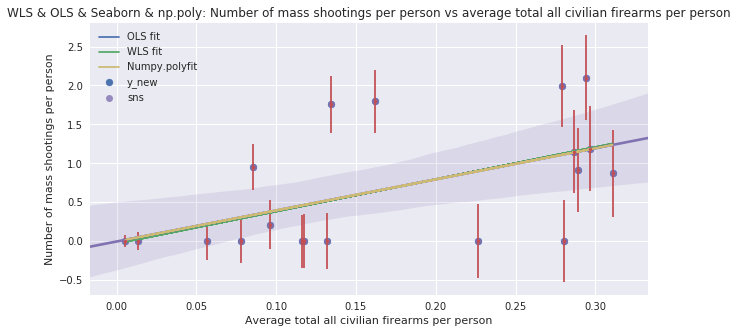

In [43]:
coefs, ffits = np.polyfit(x_new, y_new, 1)

fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
pl.title('WLS & OLS & Seaborn & np.poly: Number of mass shootings per person vs average total all civilian firearms per person')

ax.scatter(x_new, y_new, label='y_new')
plt.plot(x_new, smfit_ols.predict(x_new_add), label="OLS fit")
plt.plot(x_new, smfit_wls.predict(x_new_add), label="WLS fit")
plt.errorbar(x_new, y_new, yerr=[np.sqrt(xx) for xx in x_new], fmt='.', label='')
sns.regplot(x_new, y_new, ax=ax, label="sns")
plt.plot(x_new, coefs * x_new + ffits,  label = 'Numpy.polyfit')

ax.set_xlabel("Average total all civilian firearms per person")
ax.set_ylabel("Number of mass shootings per person")
ax.set_ylim()
plt.legend()
pl.show()

### After outlier removal, the R-Square of OLS and WLS increased.